# Tree ensembles

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bagging" data-toc-modified-id="Bagging-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bagging</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#The-problem" data-toc-modified-id="The-problem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The problem</a></span><ul class="toc-item"><li><span><a href="#The-metric" data-toc-modified-id="The-metric-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>The metric</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Train test split</a></span></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Decision-tree-classifier" data-toc-modified-id="Decision-tree-classifier-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Decision tree classifier</a></span></li><li><span><a href="#Decision-tree-classifier" data-toc-modified-id="Decision-tree-classifier-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Decision tree classifier</a></span></li></ul></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Boosting</a></span></li><li><span><a href="#Gradient-Boosting" data-toc-modified-id="Gradient-Boosting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient Boosting</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Decision-tree-classifier" data-toc-modified-id="Decision-tree-classifier-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Decision tree classifier</a></span></li></ul></li></ul></li><li><span><a href="#NOTE" data-toc-modified-id="NOTE-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>NOTE</a></span></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

In [1]:
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV

Ensemble models in ML are those that:
 * use several *weak learners* to
 * build an averaging model than behaves better than the individual ones

## Bagging

Bagging (Bootstrap Aggregation) is a Machine Learning tool used to:
 * improve the stability of an algorithm (robust to little changes in data)
 * reduce overfitting
 
It consists on, given an original dataset $D$:
 1. building different datasets $D_i$ from $D$, extracting samples with replacement (bootstraping)
 2. and building a model for each dataset $D_i$
 3. for finally averaging predictions in test phase (aggregating)

<img width=600 src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/440px-Ensemble_Bagging.svg.png">

## Random Forest

Random Forest applies the Bagging logic to build several decision trees

<img width=600 src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png">

Lets build a simple Logistic Regression, a simple Decision Tree, and then look at the improvements with a Random Forest

In [4]:
df = pd.read_csv('../datasets/breast_cancer.csv')

In [5]:
df.shape

(569, 31)

Steps to follow:

### The problem

1. Choose a metric that represents our notion of good fit
2. Train-test split
3. Train a logistic regression
4. Train a decision tree
5. Train a random forest
6. Compare results

#### The metric

Will be f3 score for threshold 0.2: recall is 3x important than precision

In [6]:
threshold = 0.2

#### Train test split

In [7]:
target = "is_cancer"

In [8]:
X = df.drop(target, axis=1)
y = df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

To have an intuition of what a good metric score is, lets evaluate a baseline model

In [10]:
fbeta_score(
    y_pred=np.ones(X_test.shape[0]),
    y_true=y_test,
    beta=3
)

0.8712121212121212

#### Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
log = LogisticRegression(max_iter=10000)

In [13]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [14]:
log_test_score = fbeta_score(
    y_pred=log.predict_proba(X_test)[:, 1] > threshold,
    y_true=y_test,
    beta=3
)

In [15]:
print(f"The test score with logistic regression is {log_test_score.round(3)}")

The test score with logistic regression is 0.944


#### Decision tree classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
tree = DecisionTreeClassifier(max_depth=6)

In [62]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [63]:
tree_test_score = fbeta_score(
    y_pred=tree.predict_proba(X_test)[:, 1] > threshold,
    y_true=y_test,
    beta=3
)

In [64]:
print(f"The test score with decision tree is {tree_test_score.round(4)}")

The test score with decision tree is 0.9677


In [65]:
from sklearn.tree import plot_tree

In [66]:
import matplotlib.pyplot as plt

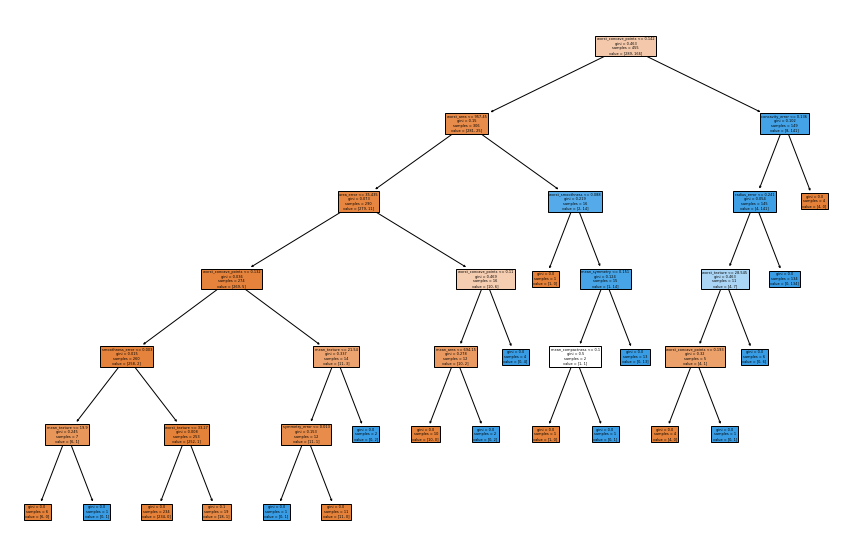

In [67]:
fig = plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=df.columns[:-1], filled=True);

In [ ]:
fig.savefig("classif_cancer.svg")

#### Decision tree classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

 * n_estimators: number of trees
 * max_depth: max depth of tree
 * max_features: number of variables to use in each tree (will change across trees)

In [81]:
rf = RandomForestClassifier(n_estimators=200, max_depth=8, max_features=30)

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=30, n_estimators=200)

In [83]:
rf_test_score = fbeta_score(
    y_pred=rf.predict_proba(X_test)[:, 1] > threshold,
    y_true=y_test,
    beta=3
)

In [84]:
print(f"The test score with random forest is {rf_test_score.round(3)}")

The test score with random forest is 0.959


## Boosting

Boosting is another ensemble technique to create a collection of predictors. In this case:
 * learners (models) are built sequentially
 * early learners fit simple models to the data
 * errors are analyzed and taken into account for the subsequent model construction 

<img width=600 src="https://iq.opengenus.org/content/images/2020/01/boosted-trees-process.png">

## Gradient Boosting

Gradient Boosting applies Boosting logic (apart from Bagging) to build several decision trees.

It fits **consecutive** trees and, at every step
 * weights the data samples differently
 * to focus on the most difficult entries to be predicted

#### Decision tree classifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

 * n_estimators: number of trees
 * max_depth: max depth of tree
 * max_features: number of variables to use in each tree (will change across trees)

In [110]:
gb = GradientBoostingClassifier(n_estimators=400, max_depth=8, max_features=30)

In [111]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features=30, n_estimators=400)

In [112]:
gb_test_score = fbeta_score(
    y_pred=gb.predict_proba(X_test)[:, 1] > threshold,
    y_true=y_test,
    beta=3
)

In [113]:
print(f"The test score with gradient boosting is {gb_test_score.round(4)}")

The test score with gradient boosting is 0.9657


What a pity, our Random Forest or Gradient boosting didn't improve Decision Tree results considerably.   
This is not the general case: normally they perform much better!!

We still can do GridSearchCV to find best hyperparams, and maybe improve the results!

## NOTE

 * Random Forests **can** be trained in a parallel manner: if you build 1000 trees, you can do it in different machines
 * Gradient Boosting **cannot** be trained in a parallel manner: trees are built sequentially

## Further materials

See [this post](https://towardsdatascience.com/decision-tree-ensembles-bagging-and-boosting-266a8ba60fd9) for an overview of the theory of Tree ensembles

[See StatQuest Gradient Boosting](https://www.youtube.com/watch?v=3CC4N4z3GJc)

[XGBoost](https://medium.com/@jboscomendoza/tutorial-xgboost-en-python-53e48fc58f73)

* [Introduction to Statistical Learning ISL (Chapter 2)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)
* [repo from tdpetrou with materials from ISL](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning)

* CheckOut: XGBoost, LightGBM, CatBoost
